import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [7]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [8]:
df[df.duplicated()].shape[0]

538

In [10]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [11]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


#### Sanity check for value ranges and to check assumptions

In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [14]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [17]:
df.describe()

,order_id,price,quantity,line_total
count,27596.000000,27596.000000,27596.000000,27596.000000
mean,14993.365995,2.511596,2.000833,5.028845
std,2888.622150,1.059402,0.819472,3.085841
min,10000.000000,0.500000,1.000000,0.500000
25%,12499.000000,1.500000,1.000000,2.500000
50%,14972.500000,2.500000,2.000000,4.500000
75%,17506.250000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [19]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [2]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [3]:
df.tail(4)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


In [4]:
df.shape

(13, 7)

In [5]:
df.size

91

In [6]:
len(df)

13

In [7]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [8]:
df['Hired'][:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Hired, dtype: object

In [9]:
df['Hired'][5]

'Y'

In [10]:
df[['Years Experience', 'Hired']]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N
5,0,Y
6,5,Y
7,3,Y
8,15,Y
9,0,N


In [11]:
df[['Years Experience', 'Hired']][:5]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N


In [12]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


In [13]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

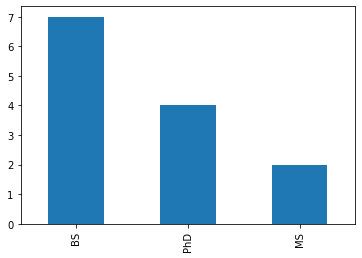

In [14]:
degree_counts.plot(kind = 'bar')

In [15]:
import numpy as np
import pandas as pd

In [16]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [17]:
pd.Series(data = my_list)

0    10
1    20
2    30
dtype: int64

In [18]:
pd.Series(data = my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [19]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

In [20]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [21]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

In [22]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [23]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [24]:
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

In [25]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany', 'Italy', 'Janpan'])

In [26]:
ser1

USA        1
Germany    2
Italy      3
Janpan     4
dtype: int64

In [27]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany', 'Italy', 'Janpan'])

In [28]:
ser2

USA        1
Germany    2
Italy      5
Janpan     4
dtype: int64

In [29]:
ser1['USA']

1

In [30]:
ser1 + ser2

USA        2
Germany    4
Italy      8
Janpan     8
dtype: int64

In [32]:
import pandas as pd
import numpy as np

In [33]:
from numpy.random import randn
np.random.seed(101)

In [34]:
df = pd.DataFrame(randn(5,4), index = 'A B C D E'.split(),columns='W X Y Z'.split())

In [35]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [36]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [37]:
df[['W', 'Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [38]:
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [39]:
type(df['W'])

pandas.core.series.Series

In [40]:
df['new'] = df['W'] + df['Y']

In [41]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [42]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [43]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [44]:
df.drop('new', axis = 1, inplace=True)

In [45]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [46]:
df.drop('E',axis = 0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [47]:
df.drop('E',axis = 0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [48]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [49]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [50]:
df.loc['B','Y']

-0.8480769834036315

In [51]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


In [52]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [53]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [54]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [55]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [56]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [57]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


In [58]:
df[(df['W']>0) & (df['Y']>1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [59]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [60]:
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [61]:
newind ='CA NY WY OR CO'.split()

In [62]:
df['States'] = newind


In [63]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [64]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [65]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [66]:
df.set_index('States',inplace=True)

In [67]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [72]:
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [71]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [73]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index ,columns=['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

In [74]:
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [75]:
df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: 1, dtype: float64

In [76]:
df.index.names

FrozenList([None, None])

In [77]:
df.index.names = ['Group', 'Num']

In [78]:
df

A         B
Group Num                    
G1    1    0.302665  1.693723
      2   -1.706086 -1.159119
      3   -0.134841  0.390528
G2    1    0.166905  0.184502
      2    0.807706  0.072960
      3    0.638787  0.329646

In [79]:
df.xs('G1')

,A,B
Num,,
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [81]:
df.xs(['G1',1])

A    0.302665
B    1.693723
Name: (G1, 1), dtype: float64

In [82]:
df.xs(1,level='Num')

,A,B
Group,,
G1,0.302665,1.693723
G2,0.166905,0.184502


In [83]:
import numpy as np
import pandas as pd

In [85]:
df = pd.DataFrame({'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]})

In [86]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [87]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [88]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [89]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [90]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [91]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [99]:
import pandas as pd
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],'Sales':[200,120,340,124,243,350]}

In [100]:
df = pd.DataFrame(data)

In [101]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [102]:
df.groupby('Company')

In [103]:
by_comp = df.groupby('Company')

In [104]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [105]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [106]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [107]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [108]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [109]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [110]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [111]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [113]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [114]:
import pandas as pd

In [115]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3'],'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']},index=[0,1,2,3])

In [116]:
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],'B':['B4','B5','B6','B7'],'C':['C4','C5','C6','C7'],'D':['D4','D5','D6','D7']},index=[4,5,6,7])

In [117]:
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],'B':['B8','B9','B10','B11'],'C':['C8','C9','C10','C11'],'D':['D8','D9','D10','D11']},index=[8,9,10,11])

In [118]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [119]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [120]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [121]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [122]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [123]:
left = pd.DataFrame({'key':['KO','K1','K2','K3'],'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['KO','K1','K2','K3'],'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']})

In [124]:
left

,key,A,B
0,KO,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [125]:
right

,key,C,D
0,KO,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [127]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,KO,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [129]:
left = pd.DataFrame({'key1':['KO','K0','K1','K2'],'key2':['KO','K1','K0','K1'],'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key1':['KO','K1','K1','K2'],'key2':['KO','K0','K0','K0'],'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']})

In [130]:
pd.merge(left,right,on=['key1','key2'])

,key1,key2,A,B,C,D
0,KO,KO,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [131]:
pd.merge(left,right,how='outer',on=['key1','key2'])

,key1,key2,A,B,C,D
0,KO,KO,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [132]:
pd.merge(left,right,how='right',on=['key1','key2'])

,key1,key2,A,B,C,D
0,KO,KO,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [133]:
pd.merge(left,right,how='left',on=['key1','key2'])

,key1,key2,A,B,C,D
0,KO,KO,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [134]:
left = pd.DataFrame({'A':['A0','A1','A2'],'B':['B0','B1','B2']},index=['K0','K1','K2'])
right = pd.DataFrame({'C':['C0','C2','C3'],'D':['D0','D2','D3']},index=['K0','K2','K3'])

In [135]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [136]:
left.join(right,how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [138]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [139]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [140]:
df['col2'].nunique()

3

In [141]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [142]:
newdf = df[(df['col1']>2)&(df['col2']==444)]

In [143]:
newdf

,col1,col2,col3
3,4,444,xyz


In [144]:
def times2(x):return x*2

In [145]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [146]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [147]:
df['col1'].sum()

10

In [150]:
del df['col1']

In [151]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [152]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [153]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [154]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [155]:
df.sort_values(by='col2')

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [156]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [157]:
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [158]:
import numpy as np

In [160]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],'col2':[np.nan,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [161]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [162]:
df.dropna()

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [163]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [164]:
data = {'A':['foo','foo','foo','bar','bar','bar'],'B':['one','one','two','two','one','one'],'C':['x','y','x','y','x','y'],'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)

In [165]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [166]:
df.pivot_table(values='D',index=['A','B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [167]:
import numpy as np
import pandas as pd

In [169]:
df=pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [170]:
df.to_csv('example.csv',index=False)

In [175]:
pd.read_excel('Excel_Sample.xlsx',sheetnane='Sheetl')

FileNotFoundError: [Errno 2] No such file or directory: 'Excel_Sample.xlsx'